# Introdução

Grupo: Germano Barcelos (3873), Guilherme Melos (3882), Jhonata Miranda (3859)

Neste relatório, serão introduzidos e explorados em prática os conceitos de espaço de cores e segmentação de imagens utilizando as bibliotecas _OpenCV_, _Numpy_, _MatPlotLib_ e _Scipy_ para realizar as atividades propostas.

In [1]:
import cv2
import time
import argparse
import glob
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_images(imgs, titles, x, y, figsize, cmap="viridis"):
    images_list_w_titles = list(zip(imgs, titles))
    
    f, axarr = plt.subplots(x,y, figsize=figsize)
    for i in range(x):
        for j in range(y):
            if x > 1:
                axarr[i, j].imshow(np.uint8(images_list_w_titles[(i*y)+j][0]), cmap=cmap)
                axarr[i, j].set_title(images_list_w_titles[(i*y)+j][1])
            else:
                axarr[j].imshow(np.uint8(images_list_w_titles[(i*y)+j][0]), cmap=cmap)
                axarr[j].set_title(images_list_w_titles[(i*y)+j][1])

def get_spacecolor(original):
    scale_percent = 60 # percent of original size
    width = int(original.shape[1] * scale_percent / 100)
    height = int(original.shape[0] * scale_percent / 100)
    dim = (width, height)

    original = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)
    
    # Convert the BGR image to other color spaces
    imageBGR = cv2.cvtColor(original,cv2.COLOR_BGR2RGB)
    imageHSV = cv2.cvtColor(original,cv2.COLOR_BGR2HSV)
    imageLAB = cv2.cvtColor(original,cv2.COLOR_BGR2LAB)
    return imageBGR, imageHSV, imageLAB

## Rostos

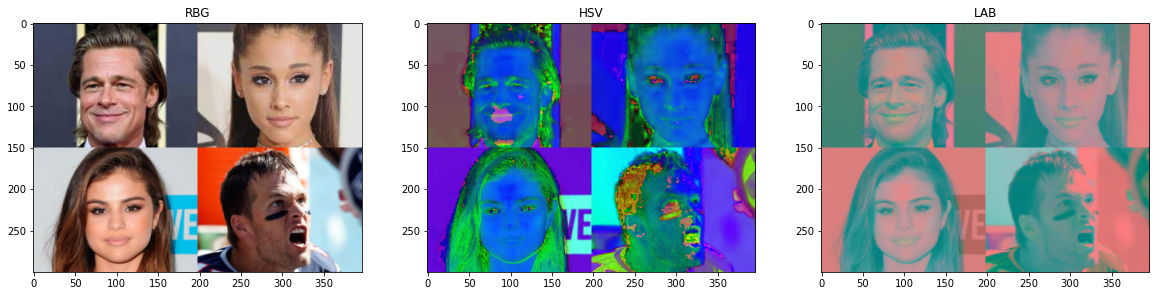

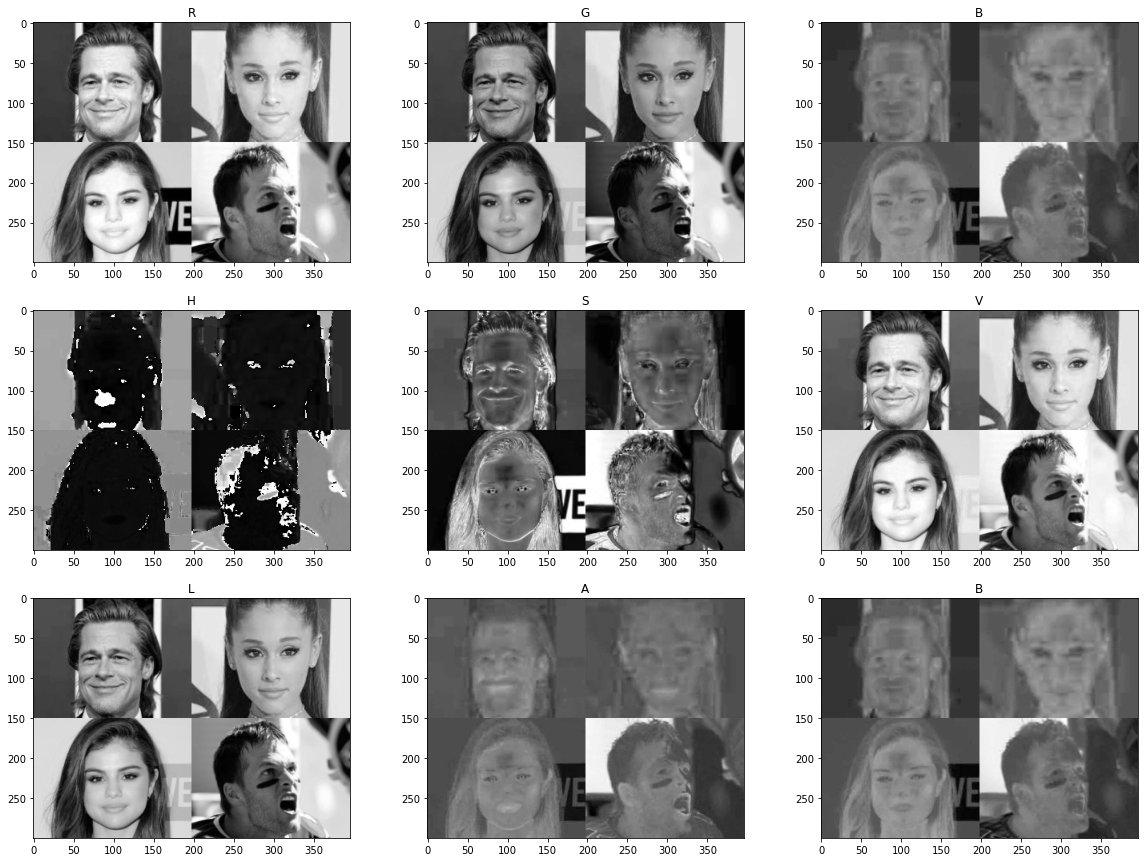

In [16]:
original=cv2.imread("images/colagem_rostos.jpg")

imageBGR, imageHSV, imageLAB = get_spacecolor(original)

imgs = [imageBGR, imageHSV, imageLAB]
titles = ["RBG", "HSV", "LAB"]
plot_images(imgs, titles, 1, 3, (20, 20))

R,G,B = cv2.split(imageBGR)
H,S,V = cv2.split(imageHSV) 
L,A,B = cv2.split(imageLAB)

imgs = [R, G, B, H, S, V, L, A, B]
titles = ["R", "G", "B", "H", "S", "V", "L", "A", "B"]
plot_images(imgs, titles, 3, 3, (20, 15), cmap="gray")


## Flor

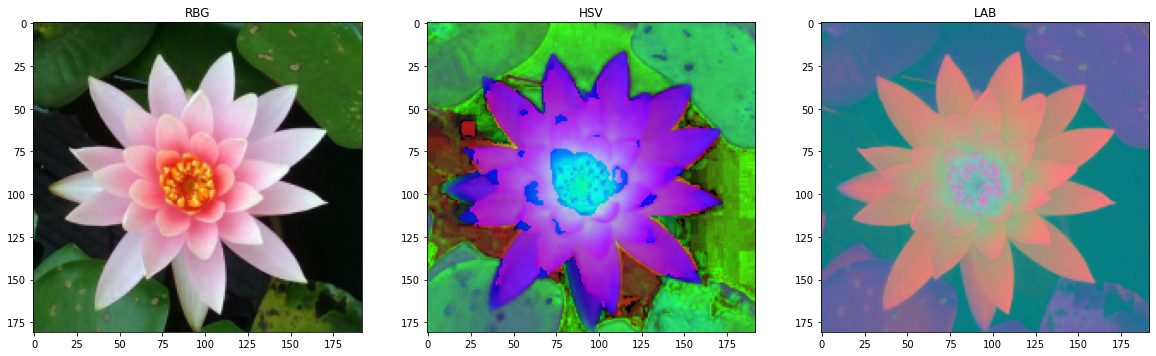

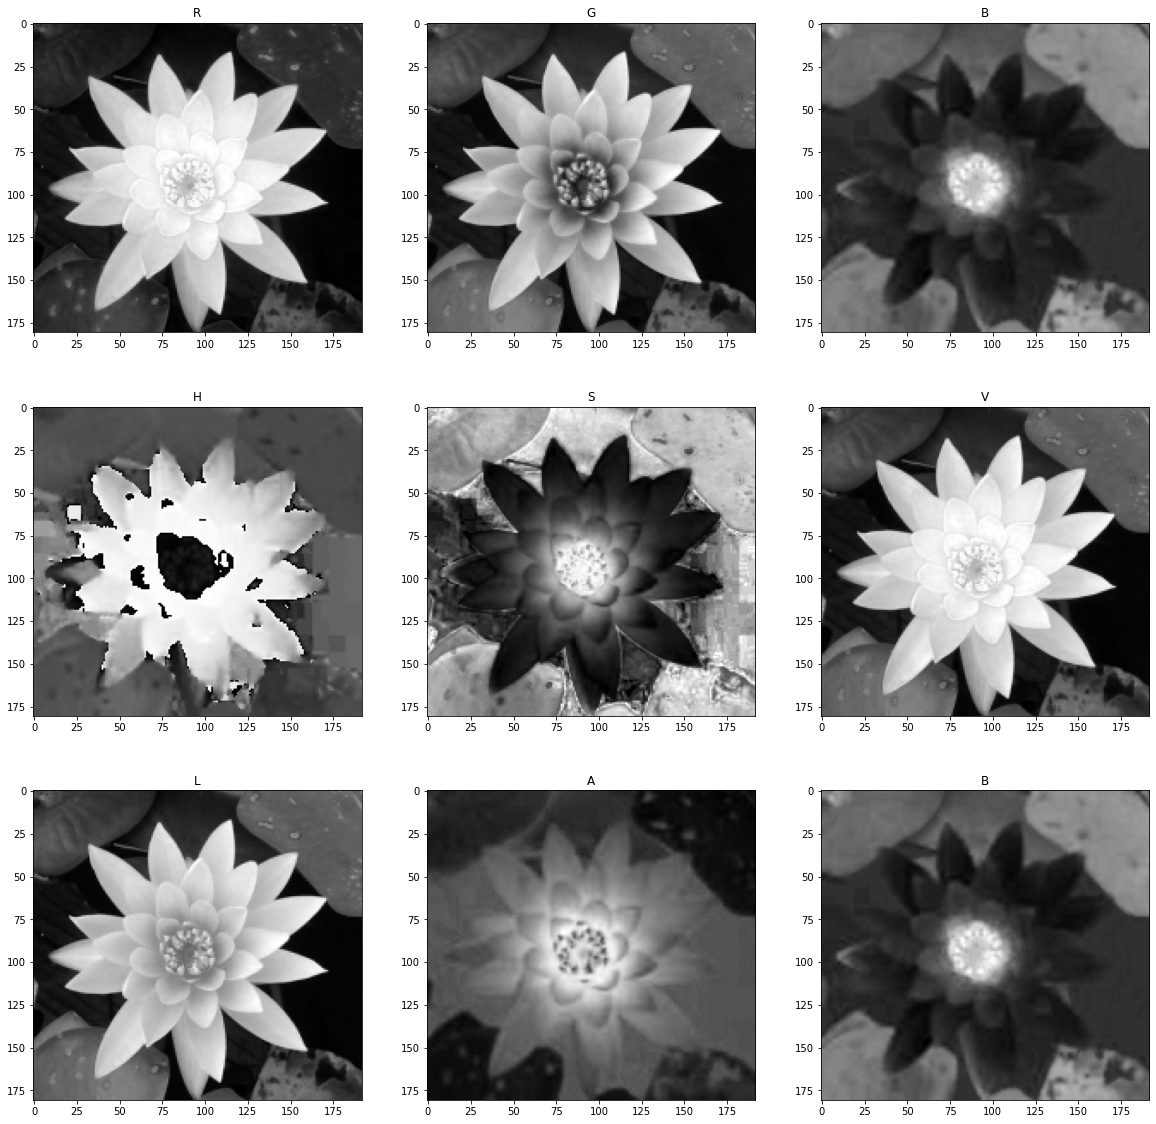

In [14]:
original=cv2.imread("images/flor.jpg")


imageBGR, imageHSV, imageLAB = get_spacecolor(original)

imgs = [imageBGR, imageHSV, imageLAB]
titles = ["RBG", "HSV", "LAB"]
plot_images(imgs, titles, 1, 3, (20, 20))

R,G,B = cv2.split(imageBGR)
H,S,V = cv2.split(imageHSV) 
L,A,B = cv2.split(imageLAB)

imgs = [R, G, B, H, S, V, L, A, B]
titles = ["R", "G", "B", "H", "S", "V", "L", "A", "B"]
plot_images(imgs, titles, 3, 3, (20, 20), cmap="gray")

## Praia

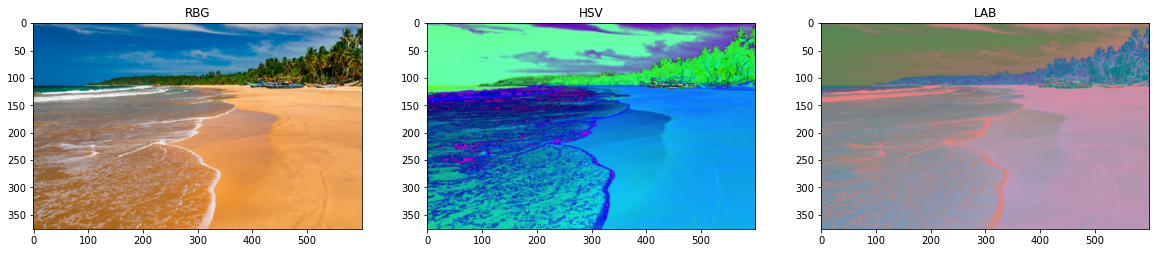

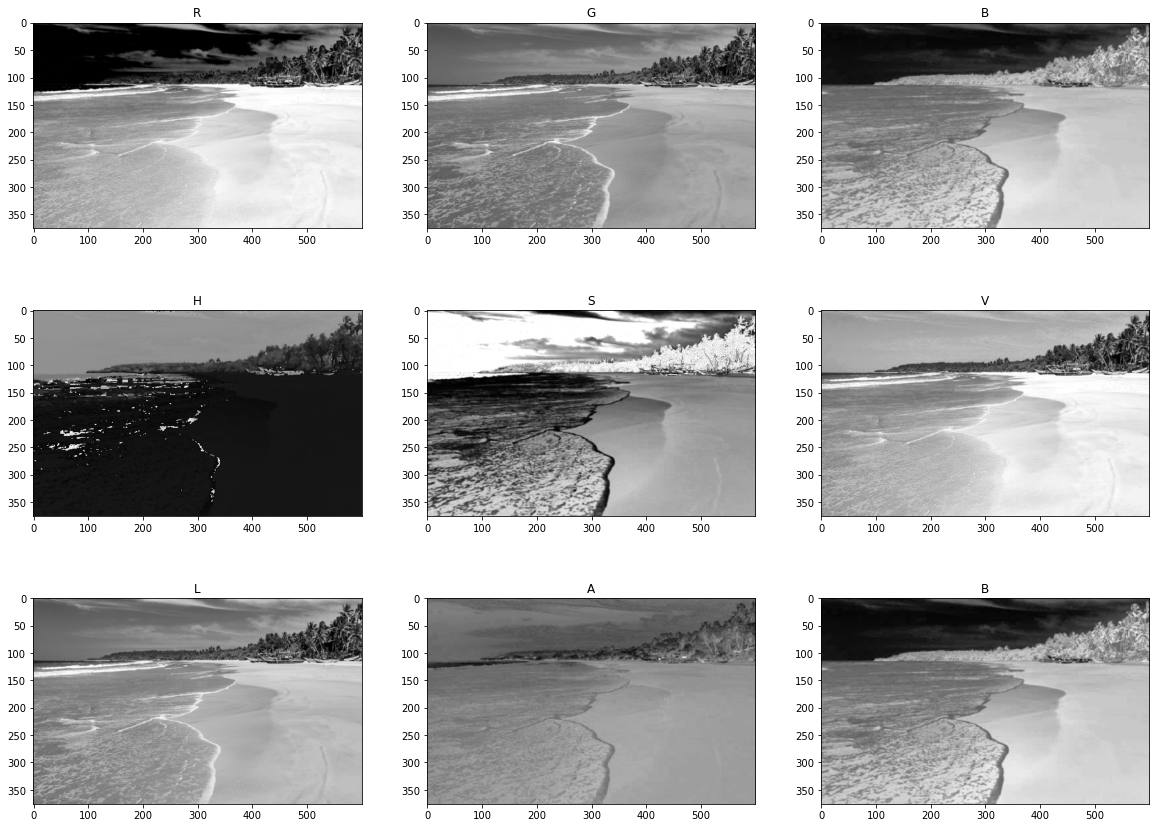

In [17]:
original=cv2.imread("images/praia.jpg")

imageBGR, imageHSV, imageLAB = get_spacecolor(original)

imgs = [imageBGR, imageHSV, imageLAB]
titles = ["RBG", "HSV", "LAB"]
plot_images(imgs, titles, 1, 3, (20, 20))

R,G,B = cv2.split(imageBGR)
H,S,V = cv2.split(imageHSV) 
L,A,B = cv2.split(imageLAB)

imgs = [R, G, B, H, S, V, L, A, B]
titles = ["R", "G", "B", "H", "S", "V", "L", "A", "B"]
plot_images(imgs, titles, 3, 3, (20, 15), cmap="gray")

# Exercício 4

In [ ]:

# segmenta cores no espaço hsv , detectando a cor azul.
# funciona com camera ou imagem lida.

import cv2
import numpy as np

#Dica
# Region Of Interest of a Image (ROI)
# se usarmos o comando abaixo, estamos extraindo uma janela de uma imagem original
# e salvando em temp.
# Depois, substituimos na imagem original uma outra janela com a imagem copiada,
# criando assim um efeito de repetição da imagem recortada na imagem original

# temp = img[280:340, 330:390]
# img[273:333, 100:160] = temp

# isto é muito util, pois podemos criar imagens menores com regiao de nosso
# interesse , a parrtir de imagens maiores. O comando abaixo cria uma nova imagem
# de zeros, de 300x200. Se recortarmos um pedaço da imagem original, podemos
# colar nesta noma "imagem"
# mask = np.zeros((300,200), np.uint8)

cap = cv2.VideoCapture("videocanetas.mp4")
while(True):

    # Take each frame
    ret , frame = cap.read()
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    vid_writer = cv2.VideoWriter('saida.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 60, (frame_width,frame_height))
        
    if ret == True:
        # Convert BGR to HSV
        # hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # define range of blue color in HSV

        lower_blue = np.array([177, 76, 52])
        upper_blue = np.array([218, 114, 93])

        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(frame, lower_blue, upper_blue)
        kernel = np.ones((5, 5), np.uint8)
        mask2=cv2.erode(mask, kernel, 3)
        # mask2=cv2.dilate(mask2, kernel, 3)

        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame, frame, mask= mask2)

        # cv2.imshow('frame', frame)
        # cv2.imshow('mask', mask)
        # cv2.imshow('res', res)
        # cv2.imshow('erode/dilate', mask2)
        
        #cv2.VideoWriter('saida.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
        vid_writer.write((res).astype(np.uint8))
        
        #out = cv2.VideoWriter('saida.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            cap.release()
            break
    vid_writer.release()
    cv2.destroyAllWindows()

